# Principle Component Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)

data = pd.read_csv('data/cleaned/voice_data.csv')
X_train = pd.read_csv('data/cleaned/X_train.csv')
y_train = pd.read_csv('data/cleaned/y_train.csv')
X_test = pd.read_csv('data/cleaned/X_test.csv')
y_test = pd.read_csv('data/cleaned/y_test.csv')

C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  arr = pd.Series()
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_12992\1469778427.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fut

<Axes: >

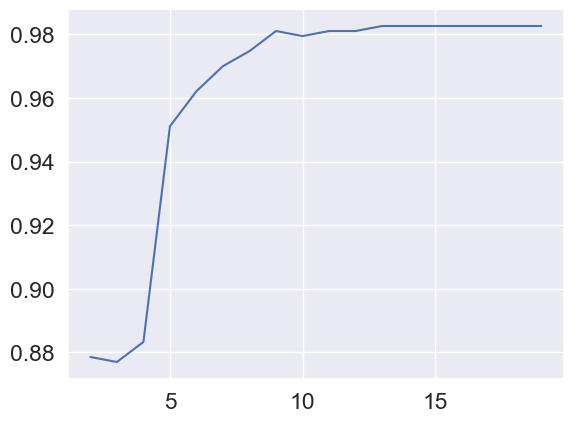

In [3]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

arr = pd.Series()

for n_components in range(2, X_train.columns.size + 1):
    pca = PCA(n_components=n_components, random_state=87)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm = SVC(random_state=87).fit(X_train_pca, y_train.squeeze())
    arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))

arr.plot()

In [4]:
arr

2     0.878549
3     0.876972
4     0.883281
5     0.951104
6     0.962145
7     0.970032
8     0.974763
9     0.981073
10    0.979495
11    0.981073
12    0.981073
13    0.982650
14    0.982650
15    0.982650
16    0.982650
17    0.982650
18    0.982650
19    0.982650
dtype: float64

C:\Users\pufan\AppData\Local\Temp\ipykernel_14840\1987821375.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  arr = pd.Series()
C:\Users\pufan\AppData\Local\Temp\ipykernel_14840\1987821375.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_14840\1987821375.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))
C:\Users\pufan\AppData\Local\Temp\ipykernel_14840\1987821375.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future

<Axes: >

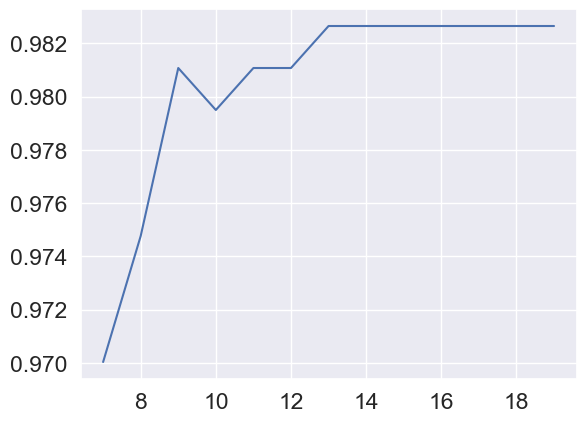

In [5]:
arr = pd.Series()

for n_components in range(7, X_train.columns.size + 1):
    pca = PCA(n_components=n_components, random_state=87)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svm = SVC(random_state=87).fit(X_train_pca, y_train.squeeze())
    arr = arr.append(pd.Series(svm.score(X_test_pca, y_test.squeeze()), index=[n_components]))

arr.plot()

## Plotting the PCA with SVM

In [6]:
"""
from sklearn.svm import SVC


def draw_svm_plot_subplot(svm, X, y, title, axes):
    X = np.array(X)
    y = np.array(y == "female")

    axes.set_title(title)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    axes.axis("tight")

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

    axes.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1])
    # axes.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors="none", edgecolors="k")

figure, axes = plt.subplots(2, 2, figsize=(40, 40))
draw_svm_plot_subplot(SVC(random_state=87, kernel="linear").fit(X_train_pca, y_train.squeeze()), X_train_pca, y_train, "Linear Kernel", axes[0, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="poly", degree=3).fit(X_train_pca, y_train.squeeze()), X_train_pca, y_train, "Polynomial Kernel", axes[0, 1])
draw_svm_plot_subplot(SVC(random_state=87, kernel="rbf", gamma=0.1).fit(X_train_pca, y_train.squeeze()), X_train_pca, y_train, "Gaussian Kernel", axes[1, 0])
draw_svm_plot_subplot(SVC(random_state=87, kernel="sigmoid", gamma=0.1, coef0=0.1).fit(X_train_pca, y_train.squeeze()), X_train_pca, y_train, "Sigmoid Kernel", axes[1, 1])
"""

'\nfrom sklearn.svm import SVC\n\n\ndef draw_svm_plot_subplot(svm, X, y, title, axes):\n    X = np.array(X)\n    y = np.array(y == "female")\n\n    axes.set_title(title)\n    axes.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)\n    axes.axis("tight")\n\n    x_min = X[:, 0].min()\n    x_max = X[:, 0].max()\n    y_min = X[:, 1].min()\n    y_max = X[:, 1].max()\n\n    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]\n    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)\n\n    axes.contour(XX, YY, Z, colors=["k", "k", "k"], linestyles=["--", "-", "--"], levels=[-1, 0, 1])\n    # axes.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=0.5, facecolors="none", edgecolors="k")\n\nfigure, axes = plt.subplots(2, 2, figsize=(40, 40))\ndraw_svm_plot_subplot(SVC(random_state=87, kernel="linear").fit(X_train_pca, y_train.squeeze()), X_train_pca, y_train, "Linear Kernel", axes[0, 0])\ndraw_svm_plot_subplot(SVC(random_state=87, ker